# Functions to Evaluate Recommendation Models
Functionalized code such that different content models are imported as modules and then standard evaluation functions are called and the results are saved to a text file.   
The following markdown describes the various parameters that must be set depending on the model being evaluated 

- 5 metrics: personalization, precision & recall @K, personal diversity, global diversity, average rating 
- For all metrics, calculate on a random subset of users and take average value. For personalization, take average across k sets (folds) of random users because comparing users to each other.    
- Set seeds such that evaluate different models on the same set of users 
- Record results from each model in a text file to compare

## Evaluation Metrics
Described more thoroughly with visualizations of matrix multiplication in Methodological Appendix

- Personalized recommendations: provide materially different sets of recommendations for different users
- Accurate recommendations: high precision and recall based on test/train split of user ratings
- Personal diversity: provide variety of recommendations to each individual user
- Average rating: recommend high quality movies with high average ratings
- Global diversity: recommend movies in the long tail. Do not only recommend popular movies because this will not increase overall viewership, engagement with the streaming platform 

## Flow of Model Building/Testing
1. Content models with different combinations of metadata
2. Combined content models where some subset of movies are evaluated using one model and another subset with another
    - Best result is used for item-item recommendations in UI
3. Collaboartive Filtering Models
4. Combined collaborative filtering and content models where some subset of movies are evaluated with collaborative filtering and another subset with a content model 
    - Best result is used for personalized recommendations in UI

## How To: Import Recommendation System

1)  Convert recommendation system notebook to .py

2) Import function using:

from <name.py> import <name of the recomendation function>
    
example: from contentbasedrecommendationsystem import user_content_recommendations
    
3) recommendation_system: give the name of the recommendation system, you want to get the evaluations for   
    
    
## How to: Run different types of models
- Individual content model with full data:
    - df1 = sparse dataset
    - cols1 = columns from df1
    - movieIds = moviesIds (row names) from df1
    - keep_movies = movieIds  
    - keep_movies1 = []
    - keep_movies2 = []
    - recommendation_system = content_based_recommendations.user_content_recommendations
    - df2 = False, cols2 = False, recommendation_system_input1, recommendation_system_input2 = False
    - list_user = set(ratings.userId)
- Individual content model with specific subsets of movies:
    - keep_movies = subset of movies (likely either movieIds_tags or movieIds_notags)
        - Evaluate on subset
    - keep_movies1 = same subset 
        - Generate recommendations only from subset
    - Else same
- Combined content model with two different input datasets
    - df1 = sparse dataset1 , df2 = sparse dataset2
    - cols1 = columns from df1, col2 = columns from df2
    - keep_movies = movieIds  (evaluate on all movies)
    - keep_movies1 = subset 1
    - keep_movies2 = subset 2
    - keep_movies = movieIds (row names) from df1 or df2 -- identical 
    - recommendation_system_input1 = content_based_recommendations.user_content_recommendations
    - recommendation_system_input2 = False
    - recommendation_system = content_based_recommendations_combine.content_models_combine
    - list_user = set(ratings.userId)
- Collaborative model
    - df1 = sparse dataset1 (baseline content) 
        - Evaluate personal diversity based on baseline features
    - df2 = collaborative filtering pretrained
    - keep_movies = collab_predictions.movieId.unique()
    - keep_movies1, keep_movies2 = []
    - recommendation_system = collab_recommendations.collab_recommendations
    - df1, cols1, recommendation_system_input1, recommendation_system_input2 = False
    - list_user = set(collab_predictions.userId)
- Combined content and collaborative model
    - df1 = sparse dataset1, df2 = collab_predictions (pre-computed predictions)
    - keep_movies = movieIds 
    - keep_movies1, keep_movies2 = []
        - Kept movies calculated at a user level
    - recommendation_system_input1 = content_based_recommendations.user_content_recommendations
    - recommendation_system_input2 = collab_recommendations.collab_recommendations
    - recommendation_system = recommendation_system = collab_content_recommendations_combine.collab_content_combine
    - list_user = set(collab_predictions.userId)

# Result Summary
List text file titles and (sparse dataframe) for each model. See Methodological Appendix for full summary of results and conclusions. 

### Content Models 
- content_initial_eval.txt (processed_df_sparse): genre, actor, director. Cosine similarity between movies
- contentv2_noMovieNorm_eval.txt (processed_df_sparse): same data, but no normalization of movie vector (true for all others)
- content_all_meta_eval.txt (processed_df_all_meta_sparse): genre, actor, director, decade, country, production company 
    - Try also with each individual feature in the "all" version: content_<genre, actors_directors, decade, country, production>_eval.txt
- content_baseline_plus_prod_eval.txt: genre, actors, director, production company 
    - country and decade individually perform poorly individually
- content_desc_eval.txt (processed_df_desc): top 5 TF-IDF tokens from movie description
    - Add Genre tokens: content_desc_genre_eval.txt (processed_df_desc_genre_sparse): description tokens and genre
- content_tags_eval (processed_df_tags_sparse): top 5 TF-IDF genome tags
- content_tags_rel_eval.txt (processed_df_tags_rel_sparse): top 5 genome tags by relevance score
- content_baseline_tags_rel_eval.txt (processed_df_baseline_tags_rel_sparse): top 5 tags by relevance + baseline features
- content_text_eval.txt (processed_df_text_sparse): top 5 TF-IDF text field (tags + description)

### Combined Content Models
(1) Evaluate models on relevant dataset     
- content_tags_rel_only_eval.txt (processed_df_tags_rel_sparse + keep_cols = movieIds_tags): top 5 genome tags by relevance score ONLY with movies that have tags
- content_tags_only_eval.txt (processed_df_tags_sparse + keep_cols = movieIds_tags): top 5 genome tags by tfidf ONLY with movies that have tags
- content_text_tagsonly_eval.txt (processed_df_text_sparse + keep_cols = movieIds_tags): top 5 tags+description fields by tfidf ONLY with movies that have tags
- content_baseline_notags_eval.txt (processed_df_sparse + keep_cols = movieIds_notags): baseline model (genre, actor, director) only for movies without tags (long tail) 

(2) Evaluate combined models on full dataset   
- content_twomodels_tags_rel_eval.txt: combination of content_baseline_notags_eval and content_tags_rel_only_eval models using content_based_recommendations_combine system
- content_twomodels_tags_eval.txt: combination of content_baseline_notags_eval and content_tags_only_eval models using content_based_recommendations_combine system
- content_twomodels_text_eval.txt: combination of content_baseline_notags_eval and content_text_tagsonly_eval models using content_based_recommendations_combine system

### Collaborative Filtering 
- Evaluation_collaborative_filtering_model_svdpp.txt: SVDpp model 
- collaborative_with_sim_msd.txt: KNNbaseline with Mean Squared Difference similarity
- collaborative_with_sim_pearson_baseline.txt: KNNbaseline with Pearson correlation coefficient similarity 

### Combined Collaborative Filtering, Content Models
(1) Which content model to use for movies not in collaborative filtering
- content_baseline_nocollab_eval.txt: Baseline content model on movies not included in collaborative filtering predictions
    - keep_movies = set(movieIds).difference(set(collab_predictions.movieId.unique())) 
    - keep_movies1 = set(movieIds).difference(set(collab_predictions.movieId.unique())) 
    - list_user = set(collab_predictions.userId)
- content_combined_tags_nocollab_eval.txt: Combined text model on movies not included in collaborative filtering 
    - keep_movies = set(movieIds).difference(set(collab_predictions.movieId.unique())) 
    - keep_movies1 = set(movieIds_notags).difference(set(collab_predictions.movieId.unique())) 
    - keep_movies2 = set(movieIds_tags).difference(set(collab_predictions.movieId.unique())) 
    - list_user = set(collab_predictions.userId)
  
(2) Combined content and collaborative filtering model 
- collab_content_combine_5000users.txt: combination of content_baseline_nocollab_eval and best collaborative model using collab_content_combine system

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import operator
import scipy.spatial.distance as distance
from sklearn import metrics 
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import fastparquet
import pickle
import scipy
import sklearn
from surprise import SVD, Dataset, Reader, KNNBaseline
import recommendation_models.content_based_recommendations
import recommendation_models.content_based_recommendations_combine
import recommendation_models.collab_content_recommendations_combine
import recommendation_models.collab_recommendations

## Load Data

In [2]:
# ratings and movie ratings aggregation data
ratings = pd.read_parquet('processed_files/ratings_sample.parq')
ratings = ratings.reset_index()
movies_ratings = pd.read_parquet('processed_files/movies_ratings.parq')
movies_ratings = movies_ratings.rename(columns={"avg": "Average_Ratings"})
movies_ratings['weighted_avg'] = movies_ratings.cnt * movies_ratings.Average_Ratings

In [3]:
# specify sparse matricies of features to use for content attributes 
df1 = scipy.sparse.load_npz("processed_files/processed_df_sparse.npz")
#df1 = scipy.sparse.load_npz("processed_files/processed_df_text_sparse.npz")
#df2 = False

# preloaded collaborative filtering predictions
collab_predictions = pd.read_parquet('processed_files/Predictions_5000/KNN_predictions_df.parq')
collab_predictions = collab_predictions.rename(columns = {'est':'prediction', 'uid':'userId', 'iid':'movieId'})
collab_predictions = collab_predictions.drop(columns = ['r_ui', 'details.actual_k', 'details.was_impossible'])
df2 = collab_predictions.copy()

with open('processed_files/sparse_metadata', "rb") as f:
    cols1 = pickle.load(f)
    movieIds = pickle.load(f)
    
with open('processed_files/sparse_metadata_text', "rb") as f:
    cols2 = pickle.load(f)
    movieIds = pickle.load(f)
cols2 = False

In [4]:
# load movieId lists for movies with and without tags so can specify which movies to keep for which models
with open('processed_files/movieIds_tags', "rb") as f:
    movieIds_tags = pickle.load(f)
with open('processed_files/movieIds_notags', "rb") as f:
    movieIds_notags = pickle.load(f)

In [5]:
# specify which movies we want to keep for evaluation and for generating recommendations 
keep_movies = movieIds # evaluate against
keep_movies1 = [] # generate recs from model 1 (df1) - if [] then all movies
keep_movies2 = [] # generate recs from model 2 (df2) - if [] then all movies 

In [6]:
# list of users to consider for random sampling
#list_user = set(ratings.userId)
list_user = set(collab_predictions.userId)

In [7]:
# use to get a subset of columns from processed_df_all_meta_sparse
#index = [cols.index(i) for i in cols if i.startswith('production') | i.startswith('genres') | i.startswith('actors') |
#        i.startswith('director')]
#df = df[:, index]
#cols = [cols[i] for i in index]

## Define Parameters
- n = # number of users
- top_n = # top recommendations

In [8]:
n = 20
top_n = 10

## Helper Fns

In [9]:
# get top n recommendations with movieIds
def user_movie_id(movies,n):
    return movies['movieId'][:n]

# get top n recommendations with average raitngs
def user_avg_rating(movies,n):
    return movies['Average_Ratings'][:n]

## Specify recommendation system(s)

In [10]:
recommendation_system_input1 = recommendation_models.content_based_recommendations.user_content_recommendations
recommendation_system_input2 = recommendation_models.collab_recommendations.collab_recommendations
#recommendation_system_input1 = False
#recommendation_system_input2 = False

#recommendation_system = recommendation_models.content_based_recommendations.user_content_recommendations
#recommendation_system = recommendation_models.content_based_recommendations_combine.content_models_combine
#recommendation_system = recommendation_models.collab_recommendations.collab_recommendations
recommendation_system = recommendation_models.collab_content_recommendations_combine.collab_content_combine

## Open file to record evaluations

In [11]:
f = open("evaluations/collab_content_combine_5000users.txt", "w")

# Personalization 
How different are recommendations for different users? Are our recomendations actually personalized?    
     
K fold cross-validation across several sets of users
- Generate recommendations for n users
- Create movie matrix with row = user, column = movie, value = 1/0 for if movie recommended
- Cosine similarity between users. Average of elements above the diagonal
- Repeat for k folds and take overall average

In [12]:
# return user predictions for each user in users_list
# return list of all predictions for users in user_list
def get_users_prediction(users_list,top_n,users_prediction,recommendation_system, df1, ratings, movieIds, movies_ratings,
                         keep_movies1, df2 = False, keep_movies2 = False,
                         recommendation_system_input1 = False, recommendation_system_input2 = False):
    for i in users_list:
        # generate recommendations 
        recommendation = recommendation_system(i, df1, ratings, movieIds, movies_ratings, keep_movies1, 
                                               df2, keep_movies2, recommendation_system_input1, recommendation_system_input2)
        # top_n recommendations
        prediction = user_movie_id(recommendation,top_n).astype(int).values
        # append to list of predictions
        users_prediction = users_prediction.append(pd.Series(prediction),ignore_index=True)
        
    return users_prediction

# generate movie matrix: 
# row = user; column = movie ; value = 0 movie not recommended, 1 movie recommended
def user_matrix(users_pred):
    data_melt= pd.DataFrame(data=users_pred).reset_index().melt(id_vars='index', value_name='movieId',)
    data_melt = data_melt[['index', 'movieId']].pivot(index='index', columns='movieId', values='movieId')
    cols = data_melt.columns
    
    # replace na with 0
    for i in cols:
        data_melt[i] = np.where(data_melt[i].isna(), 0, 1)
        
    return data_melt

# generating cosine similarity between the users. Same movie recommended for multiple users? 
# then getting the indicies of elements above diagonal (giving diagonal offsert =1 in triu_indices)
# calculating the avg of the element above diagonal 
# Personalization means 1 - similarity
# higher the personalization score, better the recommendation system in recommending personalized movies (minimize similarity)
def personalization(users_matrix,n):
   
    # cosine similiarity
    users_sim = metrics.pairwise.cosine_similarity(users_matrix)
    
    # upper triangle
    iu1 = np.triu_indices(n,k=1)
    
    # average in upper 
    similarity_avg = np.mean(users_sim[iu1])
    
    # 1 - similarity. Want to maximize score (minimize similarity)
    personalization_score = 1 - similarity_avg

    return personalization_score


# evaluate personalization on k random folds. Mean. 
def cross_fold_eval(unique_users,recommendation_system, movies_ratings, df1, keep_movies1, 
                    df2 = False, keep_movies2 = False, 
                    recommendation_system_input1 = False, recommendation_system_input2 = False, 
                    k_fold=10,n=10,top_n=10):
    
    # initiate to sum scores across folds (take average at end)
    kfold_personalization=0
    
    # look through k folds
    for i in range(k_fold):
        
        # generate list of n random users
        users_list = random.sample(unique_users, n)
        
        # columns: top_n recommendations
        # users_prediction:  top_n recommendations for n users. 
        column_names = list(range(top_n))
        users_prediction = pd.DataFrame(columns = column_names)
                
        # getting predictions for all sampled users
        users_pred = get_users_prediction(users_list,top_n,users_prediction,recommendation_system, 
                                          df1, ratings, movieIds, movies_ratings, keep_movies1,
                                          df2, keep_movies2, recommendation_system_input1, recommendation_system_input2)
        
        # getting user by movies matrix with binary indicators 0: movie not recommended, 1: movie got recommended
        users_matrix = user_matrix(users_pred)
        
        # find personalization score based on movie matrix. Sum across folds 
        kfold_personalization+=personalization(users_matrix,n)
        
        
    # average across all folds
    kfold_eval = kfold_personalization/k_fold
    
    # write to file 
    print(f'Personalization score for {k_fold} folds across {n} users for top {top_n} recommendations: {kfold_eval}', file = f)

In [13]:
# get unique user set 
# K-fold cross validation for personalization score 
cross_fold_eval(list_user,recommendation_system, movies_ratings, df1, keep_movies1, df2, keep_movies2,
                recommendation_system_input1, recommendation_system_input2, n = n, top_n = top_n)

# Precision and Recall 
- Generate train/test split among users that have at least 20 rated target movies
- Generate recommendations on train, see if got any "correct" from test. Calculate precision, recall
- Average across users

### Random samples of users who have rated minimum of 20 movies OUT OF target movies (keep_movies)
Need enough movie ratings to do a reasonable train/test split. 
- keep_movies: universe of movie we want to calculate precision and recall in 
- n_users: Number of users to filter the from the dataset

In [14]:
def target_users(ratings, keep_movies, list_user, n_users = 1000):
    
    # keep users with at least 20 ratings out of target movies (keep_movies)
    users_list = ratings[(ratings.movieId.isin(keep_movies)) & (ratings.userId.isin(list_user))
                        ].groupby('userId')['userId'].count().reset_index(name="rating_count")
    users_list = set(users_list[users_list['rating_count']>=20]['userId'].values)
    print(f' Number of users who rated at least 20 movies: {len(users_list)}')
    
    # random sample of n_users 
    random.seed(42)
    random_users = random.sample(users_list, min(n_users, len(users_list)))
    # get the ratings of the random sample of users
    users_ratings = ratings[ratings.userId.isin(random_users)]
    
    return users_ratings, random_users

users_ratings, random_users_20 = target_users(ratings, keep_movies, list_user)

 Number of users who rated at least 20 movies: 5000


### train/test split - Keeping the users distribution similar
Select subset of users and then split each user's ratings into train/test

In [15]:
def train_test_split(random_users, users_ratings):
    
    # creating train/test empty dataframe
    train = pd.DataFrame(columns=['index','userId', 'movieId', 'rating','timestamp'])
    test = pd.DataFrame(columns=['index','userId', 'movieId', 'rating','timestamp'])

    # spliting each user data equally in train test
    for i in random_users:
        
        #getting individual user index in the users_ratings list
        random_index =set(users_ratings[users_ratings['userId'] == i].index.values)

        # dividing the user ratings count/2
        n_len = np.math.floor(len(random_index)/2)

        # getting index for train data: random half of that user's ratings
        train_ind = set(random.sample(random_index, n_len))

        # getting index for test data by removing train index from all index for that user
        test_ind = set(random_index-train_ind)

        # assign indexes to train, test set
        df_train = users_ratings.loc[train_ind]
        df_test = users_ratings.loc[test_ind]
        
        # appending that user data to train/test df
        train = train.append(df_train)
        test = test.append(df_test)
        
    return train, test

train, test = train_test_split(random_users_20, users_ratings)

### Calculate Average Precision, Recall across random users
- Generate recommendations based on training data. See if get movies from the test data that the user actually liked
- Relevant item: Has in test with rating >= 2 
    - Generous definition of relevant because hard to get precision, recall without user feedback. 
    - Limit to movies in keep_movies set. Only movies possibly being generated by model
- Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)
- Recall@k = (# of recommended items @k that are relevant) / (total # of relevant items)   

In [16]:
# precision@K = (# of recommended items @k that are relevant) / (# of recommended items @k)
def calc_precision_k(recommended_relevant_count,recommended_count):
    precision_k = recommended_relevant_count/recommended_count
    return precision_k

# Recall@k = (# of recommended items @k that are relevant) / (total # of relevant items)   
def calc_recall_k(recommended_relevant_count,relevant_count):
    if relevant_count==0:
        return 0
    else:
        recall_k = recommended_relevant_count/relevant_count
        return recall_k
    
# average precision and recall across random users
def avg_precision_recall(random_userId, recommendation_system, train, test, keep_movies, movies_ratings, df1, keep_movies1, 
                         df2 = False, keep_movies2 = False, 
                         recommendation_system_input1 = False, recommendation_system_input2 = False,
                         top_n = 10, k = 5):
    
    # lists to record
    avg_precision=[]
    avg_recall =[]
    tot_rec_rel = []
    
    # if sparse matrix, then generating recommendations from a second set of recommendations
    if type(df2) == scipy.sparse.csc.csc_matrix:
        df_option = df2.copy()
    # if dataframe, then generating collaborative filtering recommendations where need to use precision option with test set
    if type(df2) == pd.core.frame.DataFrame:
        df_option = test.copy()

    
    # look through user subset
    for i in random_userId:
        
        # generate recommendations 
        recommendation = recommendation_system(i, df1, train, movieIds, movies_ratings, keep_movies1,
                                               df_option, keep_movies2, recommendation_system_input1, recommendation_system_input2,
                                               precision = True)
        # getting the recommended movies @k
        recommended_movies = set(recommendation[:k].movieId)

        # number of recommended movie @k
        recommended_count = k
        
        # getting relevant movies, where ratings >= 2
        # limit to keep movies as these are the only movies being possibly produced by the recommendation system 
        relevant_movies =set(test[(test.movieId.isin(keep_movies)) &
                                  (test['userId']==i) & (test['rating']>=2) ]['movieId'].values)
        # Total number of relevant movie
        relevant_count = len(relevant_movies)
        
        # Getting movies that are relevant and recommended (set intersection)
        recommended_relevant_movies = recommended_movies.intersection(relevant_movies)
        
        # number of relevant recommended movies
        recommended_relevant_count = len(recommended_relevant_movies)
        
        # calculate precision, recall
        precision_k = calc_precision_k(recommended_relevant_count,recommended_count)
        recall_k = calc_recall_k(recommended_relevant_count,relevant_count)
        
        # record 
        avg_precision.append(precision_k)
        avg_recall.append(recall_k)
        tot_rec_rel.append(recommended_relevant_count) # absoute number of recommended relevant movies 
        
    # take average across n users 
    precision_avg = np.mean(avg_precision)
    recall_avg = np.mean(avg_recall)
    rec_rel_avg = np.mean(tot_rec_rel)

    return precision_avg, recall_avg, rec_rel_avg

In [17]:
# out of elligible users, get random subset of n from training data (same users as in test data)

random.seed(42)
train_user_id = set(train.userId.values)
random_userId = random.sample(train_user_id, n)

__Evaluate at several values of K__    
Most informative is k = 10 because generally generating 10 recommendations for display

In [18]:
k = 5
precision_k,recall_k, rec_rel_avg = avg_precision_recall(random_userId, recommendation_system,
                                                         train, test, keep_movies, movies_ratings, 
                                                         df1, keep_movies1, df2, keep_movies2, 
                                                         recommendation_system_input1, recommendation_system_input2,
                                                         top_n, k)

print(f'Avg Precision at {k} for {n} users: {precision_k}', file = f)
print(f'Avg Recall at {k} for {n} users: {recall_k}', file = f)
print(f'Avg Number of relevant recommendations at {k} for {n} users: {rec_rel_avg}', file = f)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [19]:
k = 10
precision_k,recall_k, rec_rel_avg = avg_precision_recall(random_userId, recommendation_system,
                                                         train, test, keep_movies, movies_ratings, 
                                                         df1, keep_movies1, df2, keep_movies2, 
                                                         recommendation_system_input1, recommendation_system_input2,
                                                         top_n, k)
print(f'Avg Precision at {k} for {n} users: {precision_k}', file = f)
print(f'Avg Recall at {k} for {n} users: {recall_k}', file = f)
print(f'Avg Number of relevant recommendations at {k} for {n} users: {rec_rel_avg}', file = f)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [20]:
k = 30
precision_k,recall_k, rec_rel_avg = avg_precision_recall(random_userId, recommendation_system,
                                                         train, test, keep_movies, movies_ratings, 
                                                         df1, keep_movies1, df2, keep_movies2, 
                                                         recommendation_system_input1, recommendation_system_input2,
                                                         top_n, k)
print(f'Avg Precision at {k} for {n} users: {precision_k}', file = f)
print(f'Avg Recall at {k} for {n} users: {recall_k}', file = f)
print(f'Avg Number of relevant recommendations at {k} for {n} users: {rec_rel_avg}', file = f)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

# Personal Diversity
How different are the movies that we are recommending to users? Content models tend to "profile" people and result in over-specialization where only provide one kind of recommendation. Ideally would provide some variety.   
- Generate recommendations for random user 
- Get "profile" of each recommended movie (non zero features)
- Find cosine similarity between recommended movies. Transform to distance so maximize
- Average over n users


__NOTE:__ movies are compared based on the features in the current model. ie if model based on tags features, then looking at diversity of tags. If model based on genres and actors, then looking at diversity of actors and genres.   
- For combined models, diversity based off of baseline features in df1 (genre, actors, directors) so that all movies equally comparable


In [21]:
def personal_diversity(top_n, rand_user, recommendation_system, movies_ratings, df1, df2, keep_movies1, keep_movies2, 
                       recommendation_system_input1, recommendation_system_input2, cols1):

    length = len(rand_user)
    
    # storing diversity for n users
    diversity =[]
    # find diversity for each user
    for u in range(length):
        
        # getting recommended movies
        recommendation = recommendation_system(rand_user[u], df1, ratings, movieIds, movies_ratings, keep_movies1,
                                               df2, keep_movies2, recommendation_system_input1, recommendation_system_input2)
        
        # get top_n recommended movies 
        prediction = user_movie_id(recommendation,top_n).astype(int).values
        predicted_index = [movieIds.index(i) for i in prediction] 
        user_df = df1[predicted_index, :]
        user_movie_features = pd.DataFrame()
        
        # get movie profiles: getting only the columns that have any value 1
        for i in range(len(prediction)):
            nonzero_cols = [cols1[j] for j in user_df[i,:].nonzero()[1]]
            d = {k:1 for k in nonzero_cols}
            d = pd.DataFrame(data = d, index = [prediction[i]])    
            user_movie_features = pd.concat([user_movie_features, d])

        # replace NaN with 0
        user_movie_features = user_movie_features.fillna(0)
        
        # generating cosine similarity between the recommended movies
        sim = metrics.pairwise.cosine_similarity(np.asmatrix(user_movie_features))

        # above diagonal elements. Take average (1 - similarity so get distance, which we want to maximize)
        iu1 = np.triu_indices(user_movie_features.shape[0],k=1)
        avg = 1 - np.mean(sim[iu1])
        
        # keep track across n users
        diversity.append(avg)
        
    # calculating avg diversity over n users
    avg_diversity = np.mean(diversity)

    return avg_diversity

In [22]:
# get list of n random users 
random.seed(42)
rand_user = random.sample(list_user, n)  

avg_diversity = personal_diversity(top_n, rand_user, recommendation_system, movies_ratings, 
                                   df1, df2, keep_movies1, keep_movies2, 
                                   recommendation_system_input1, recommendation_system_input2, cols1)
print(f'Average diversity over {n} users for their top {top_n} recommendations (0 = identical): {avg_diversity}', file = f)

## Average Rating 
Want to recommend "good" movies with high average ratings    

- Generate recommendations for random users
- Merge in average ratings of the recommended movies
- Take average of average ratings 
- Take average across random sample of users

In [23]:
def average_rating(rand_user, ratings, movies_ratings, movieIds, df1, df2, keep_movies1, keep_movies2, 
                   recommendation_system, recommendation_system_input1, recommendation_system_input2):
    
    length = len(rand_user)
    avg_rating = []

    # loop through users
    for u in range(length):
        # getting recommended movies
        recommendation = recommendation_system(rand_user[u], df1, ratings, movieIds, movies_ratings, keep_movies1,
                                               df2, keep_movies2, recommendation_system_input1, recommendation_system_input2)

        # find average all movies' average ratings 
        prediction = user_avg_rating(recommendation,top_n).values

        # keep track across users
        avg_rating.append(prediction)

    # flatten list 
        # can recommend movies without ratings so lists may be diff lengths: won't work in np.mean natively
    avg_rating = [item for sublist in avg_rating for item in sublist]
    
    return avg_rating

In [24]:
# random users out of users that have rated at least one of keep_movies
list_user_keepmovies = set(ratings[(ratings.movieId.isin(keep_movies)) & (ratings.userId.isin(list_user))].userId)

random.seed(42)
rand_user = random.sample(list_user_keepmovies, n)  

avg_rating = average_rating(rand_user, ratings, movies_ratings, movieIds, df1, df2, keep_movies1, keep_movies2,
                            recommendation_system, recommendation_system_input1, recommendation_system_input2)

print(f'Average movie rating of top {top_n} movies recommended to {n} users: {np.round(np.mean(avg_rating),2)}', file = f)

__Graph Distribution of Ratings__

Text(0.5, 1.0, 'Ratings - Recommended Movies')

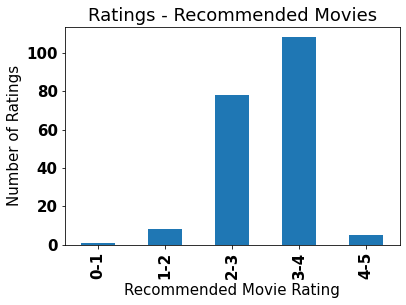

In [25]:
ranges = ['0-1', '1-2', '2-3', '3-4', '4-5']
ad = pd.DataFrame(avg_rating).melt()
ad['ratingrange'] = pd.cut(ad['value'], bins=[0,1,2,3,4,5], labels=ranges, right=True)

font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

ax = ad.groupby(['ratingrange'])['ratingrange'].count().plot.bar()
ax.set_ylabel('Number of Ratings')
ax.set_xlabel('Recommended Movie Rating')
ax.set_title('Ratings - Recommended Movies')

# Global Diversity: Checking for the long tail
Want to recommend some "unpopular" movies such that users view movies in the long tail that they otherwise would not be exposed to
- Generate recommendations for random  users
- Merge in count of number of reviews for the recommended movies
- Take the minimum count (extent of the long tail)
- Average minimum counts across random users

In [26]:
def global_diversity(rand_user, ratings, movies_ratings, movieIds, df1, df2, keep_movies1, keep_movies2, 
                     recommendation_system, recommendation_system_input1, recommendation_system_input2):

    length = len(rand_user)
    min_cnt = []

    # loop through random users
    for u in range(length):
        # getting recommended movies
        recommendation = recommendation_system(rand_user[u], df1, ratings, movieIds, movies_ratings, keep_movies1,
                                               df2, keep_movies2, recommendation_system_input1, recommendation_system_input2)

        # getting the min rating cnt of the movies recommended
        min_rating_cnt = recommendation[:top_n]['cnt'].min()
        
        # keep track
        min_cnt.append(min_rating_cnt)

    # take average of minimum counts 
    avg_min_cnt = np.mean(min_cnt)
    
    return avg_min_cnt

In [27]:
random.seed(42)
# random sample of n users 
rand_user = random.sample(list_user, n)  

avg_min_cnt = global_diversity(rand_user, ratings, movies_ratings, movieIds, df1, df2, keep_movies1, keep_movies2, 
                               recommendation_system, recommendation_system_input1, recommendation_system_input2)

print(f"Average of the minimum count of ratings for {n} user's top {top_n} recommendations (long tail):{np.round(avg_min_cnt,2)}",
      file = f)

## Close File

In [28]:
f.close()